# RNN

- Keras를 이용한 텍스트 분류는 DNN, CNN, RNN 등으로 해결 가능한데 그 중에서도 일반적으로 자연어 처리는 RNN을 많이 이용합니다. 자연어 처리의 대부분이 현재 입력된 문장을 가지고 다음 문장이나 단어를 예측하는 경우가 많아서입니다.
- 한글같은 경우는 SK에서 만든 koBERT를 많이 이용하는데 샘플코드가 pyTorch로 제공되기 때문에 Keras대신에 pyTorch를 이용하는 경우도 많습니다.
- AI분야로 취업을 하고자할 때는 취업하고자 하는 기업이 어떤 프레임워크를 사용하는지 조사할 필요가 있습니다.



### 1. 훈련 데이터에 대한 이해
자연어처리는 지도학습이므로 레이블이 있어야하고 피처데이터와 레이블이 분리되어 있어야합니다. 스팸 메일 분류의 경우, 메일의 내용과 스팸 여부를 나타내는 레이블이 있어야 합니다.

### 2. keras의 단어 정수 변환 인덱스
keras가 부여하는 인덱스는 빈도 수를 가지고 인덱싱을 합니다.
1번 데이터가 가장 많이 등장한 데이터입니다.
만약, 빈도수가 동일하면 훈련을 할 때 먼저 등장한 단어가 앞쪽의 인덱스를 부여받습니다.



### 3. SimpleRNN으로 입력층을 만드는 경우
SimpleRNN(hidden_size, input_shape=(timesteps, input_dim))의 형태로 작성합니다.
- hidden_size 는 뉴런의 개수(unit이라는 표현을 하기도 합니다.)로, 출력층에 사용되는 경우라면 출력 종류의 개수를 의미합니다.
- timespeps : 하나의 데이터를 몇 개의 구간으로 나누어서 처리할 것이냐 하는 건데 자연어 처리에서는 각 문서에서의 단어의 개수입니다.
- input_dim : 단어의 벡터 표현의 차원 수입니다.


### Many To One 문제
- RNN 에서 각 층을 만들 때 Many TO Many문제를 해결하기 위해 return_sequence=True를 설정해주어야 합니다.

🎈Many To One이란?



### 이중 분류인지 다중 분류인지 확인
- 이중 분류일 때는 loss function(손실 함수)로 binary_crossentry으로 설정하지만 



## keggle - RNN을 이용한 Spam detection


### 1. 데이터 다운로드 
keggle 사이트에서 SMS Spam Collection Dataset의 데이터 셋을 다운 받습니다.
https://www.kaggle.com/uciml/sms-spam-collection-dataset

저는 colab으로 진행하므로 google drive에  파일을 위치시켰습니다.
데이터 모양을 보면 ```v1```, ```v2```로 이루어져 있고 ```ham``` or ```spam```,``` 문장``` 의 형태로 이루어져 있습니다.



In [ ]:
import numpy as np
import pandas as pd 

%matplotlib inline
import matplotlib.pyplot as plt

# 웹에서 고정된 파일 다운로드할 때 사용
import urllib.request

# 단어 단위로 분리
from tensorflow.keras.preprocessing.text import Tokenizer
# 문장들의 길이를 동일하게 만들기 위한 함수
from tensorflow.keras.preprocessing.sequence import pad_sequences

- keras에서 데이터를 가져오고 용량이 크지 않으므로 ```content/sample_data```에 위치시키겠습니다.

In [ ]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv', filename='/content/sample_data/spam.csv')
data = pd.read_csv('/content/sample_data/spam.csv', encoding='latin1')
print('샘플의 개수 : ', len(data))

샘플의 개수 :  5572


- 데이터 확인

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


- 불필요한 컬럼이 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'이라는 이름으로 들어왔으므로 지워줍니다. 

In [ ]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- label로 사용할 컬럼이 v1 인데 문자열로 만들어져 있습니다 .이 컬럼을 숫자 데이터로 변환을 해주어야 합니다.
LabelEncoding(각각의 값을 하나의 정수로 표현)을 해야 하는데 LabelEncoder를 사용하면 spelling순서대로 Encoding이 되기 때문에 이 작업은 직접 하는 것이 좋습니다.
저는 아래와 같이 Encoding을 해주겠습니다.또한 이 내용은 적어두어야 나중에 데이터 확인시 편합니다

- ham(spam이 아닐 경우) : 0
- spam(spam일 경우) : 1



## v1에 대해 LabelEncoding 
- v1의 값을 0과 1로 치환

In [ ]:
data['v1'] = data['v1'].replace(['ham','spam'],[0, 1])
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Missing Data 확인
- False이므로 NaN데이터에 대한 처리는 불필요합니다.

In [ ]:
data.isnull().values.any()

False

### 중복데이터 확인
직접 스크래핑하는 경우 반복문을 잘못 쓰거나 유저가 입력한 데이터의 경우 실수로 여러 개의 데이터가 입력되는 경우가 있습니다. 그러므로 직접 스크래핑하는 경우는 꼭! 중복 데이터가 있는지 확인해주고 처리를 해주어야 합니다. 다음과 같이 위에서 출력했던 ```샘플의 개수 :  5572개``` 와 중복데이터를 제외한 데이터 수가 ```5169개```로 일치하지 않습니다.  

- 데이터에 고유값이 무엇이 있는지 알고 싶다면 unique 
- 총 고유값의 수가 몇 개인지 알고 싶다면 nunique
- 값별로 데이터의 개수를 알고 싶다면 value_counts

In [ ]:
data['v2'].nunique()

5169

### 중복제거
drop_duplicates()를 이용하여 v2컬럼의 중복을 제거해주고 data의 전체 개수와 nunique로 고유값의 수가 일치한지 확인하여 중복값이 잘 제거됐는지 확인해줍니다.

In [ ]:
data.drop_duplicates(subset = ['v2'], inplace=True)
print('샘플의 개수 : ', len(data))
print('중복되지 않은 데이터 개수 : ', data['v2'].nunique())

샘플의 개수 :  5169
중복되지 않은 데이터 개수 :  5169


### label의 분포 확인
- bar 그래프로 정상메일과 spam메일의 분포를 확인해봅니다.
- 정상메일의 분포가 더 많이 보입니다.

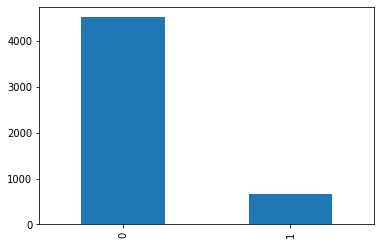

In [ ]:
data['v1'].value_counts().plot(kind='bar')

In [ ]:
print(data.groupby('v1').size().reset_index(name='count'))

   v1  count
0   0   4516
1   1    653


### feature와 label 분리


In [ ]:
X_data = data['v2']
y_data = data['v1']

print('feature(메일 본문)의 개수 : ', len(X_data))
print('label(메일 분류)의 개수 : ', len(y_data))

feature(메일 본문)의 개수 :  5169
label(메일 분류)의 개수 :  5169


### 토큰화
문장을 단어 단위로 분해하는 작업을 합니다. ```fit_on_text()```를 이용하여 texts_to_sequences를 해주면 단어 사전이 만들어집니다.

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)
sequences = tokenizer.texts_to_sequences(X_data)

print(sequences[:5])

[[47, 433, 4013, 780, 705, 662, 64, 8, 1202, 94, 121, 434, 1203, 142, 2712, 1204, 68, 57, 4014, 137], [49, 306, 1364, 435, 6, 1767], [53, 537, 8, 20, 4, 1016, 934, 2, 220, 2713, 1365, 706, 2714, 2715, 267, 2716, 70, 2713, 2, 2717, 2, 359, 537, 604, 1205, 82, 436, 185, 707, 437, 4015], [6, 226, 152, 23, 347, 2718, 6, 138, 145, 56, 152], [935, 1, 97, 96, 69, 453, 2, 877, 69, 1768, 198, 105, 438]]


### Index 확인
- word_index : 인덱스에 해당하는 단어를 확인해 볼 수 있습니다.

In [ ]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, 'call': 17, 'that': 18, 'on': 19, '2': 20, 'are': 21, 'now': 22, 'so': 23, 'but': 24, 'not': 25, 'can': 26, 'at': 27, 'or': 28, "i'm": 29, 'do': 30, 'be': 31, 'get': 32, 'will': 33, 'just': 34, 'if': 35, 'with': 36, 'we': 37, 'no': 38, 'this': 39, 'ur': 40, 'up': 41, 'gt': 42, 'lt': 43, '4': 44, 'how': 45, 'when': 46, 'go': 47, 'from': 48, 'ok': 49, 'out': 50, 'all': 51, 'what': 52, 'free': 53, 'know': 54, 'like': 55, 'then': 56, 'got': 57, 'good': 58, 'come': 59, 'am': 60, 'was': 61, 'time': 62, 'its': 63, 'only': 64, 'day': 65, 'want': 66, 'love': 67, 'there': 68, 'he': 69, 'text': 70, 'send': 71, 'going': 72, 'one': 73, 'need': 74, 'by': 75, 'lor': 76, 'home': 77, 'as': 78, 'about': 79, 'still': 80, 'see': 81, 'txt': 82, 'back': 83, 'r': 84, 'stop': 85, 'da': 86, 'k': 87, 'today': 88, 'our': 89, "i'll": 90, 'dont': 91, 'reply': 

### 희귀한 단어(빈도수가 낮은 단어) 비율 확인
- threshold : 등장 횟수를 지정합니다. 설정값 미만으로 등장한 단어
- total_cnt

In [ ]:
# 등장횟수
threshold = 2
# 전체 데이터의 길이
total_cnt = len(word_to_index)

rate_cnt = 0 # 등장 빈도수가 threshold보다 적은 데이터의 개수
total_freq = 0 # 전체 단어 빈도 합
rate_freq = 0 # 등장 빈도수가 적은 데이터의 빈도 합

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    if(value < threshold) : 
        rate_cnt = rate_cnt + 1
        rate_freq = rate_freq + value
print('등장 횟수가 %s 번 보다 적은 단어의 수 : %s' %(threshold, rate_cnt)) 
print('희귀 단어의 비율 : ' , (rate_cnt / total_cnt) * 100, '퍼센트') 
print('희귀 단어의 등장 비율 : ' , (rate_cnt / total_freq) * 100, '퍼센트') 

등장 횟수가 2 번 보다 적은 단어의 수 : 4908
희귀 단어의 비율 :  55.02242152466368 퍼센트
희귀 단어의 등장 비율 :  6.082538108811501 퍼센트


### 단어 집합의 크기 확인
- 단어 집합의 크기를 저장하고 확인합니다.

In [ ]:
vocab_size = len(word_to_index) + 1
print(vocab_size)

8921


### 각 문장의 길이 분포 확인
- 패딩을 얼마로 설정할 것인지를 결정


In [ ]:
X_data = sequences
print('배열의 최대 길이 : ', max(len(i) for i in X_data))
print('배열의 평균 길이 : ', (sum(map(len, X_data))/len(X_data)))

배열의 최대 길이 :  189
배열의 평균 길이 :  15.610369510543626


- 가장 긴 메일은 189개의 단어로 구성되어 있고 평균은 15단어정도이고 50개 단어 미만으로 구성되어 있습니다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_

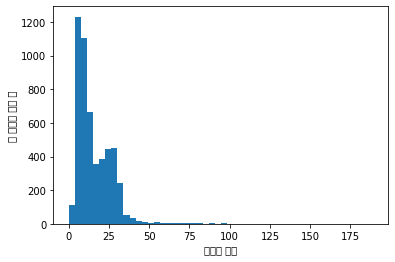

In [ ]:
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('문장의 길이')
plt.ylabel('각 문장의 단어 수')
plt.show()

### Padding 적용
자연어 처리에서의 Padding이란 모든 데이터의 길이를 맞추는 작업입니다. 딥러닝을 할 때 일반적으로 모든 입력 데이터의 shape가 같아야 하기 때문에 자연어 처리에서도 shape를 같도록 해주어야 합니다.    
빈 자리에 0을 채운다던가 남는 자리를 잘라내는 작업을 수행하게 되는데 **한국어는 기본적으로 앞에 채우고 앞에서 자릅니다.** 왜냐하면 한국어는 긍정 부정을 판단할 때 **맨 뒤의 단어로 인해 긍정 과 부정의 의미가 달라질 수 있기 때문에 뒤의 단어가 중요**합니다.


In [ ]:
max_len = 189
data = pad_sequences(X_data, maxlen =  max_len)
# 전부 189자리로 맞춤
# 패딩은 기본적으로 앞에 0을 삽입하냐면 대부분 뒤의 단어가 중요하기 때문
print(data.shape)

(5169, 189)


### 훈련 데이터와 테스트 데이터 분리

In [ ]:
n_of_train = int(len(sequences) * 0.8)

X_test = data[n_of_train:]
X_train = data[:n_of_train]

y_test = np.array(y_data[n_of_train:])
y_train = np.array(y_data[:n_of_train])

### 모델 생성과 훈련
- 정밀도가 높게 나옴

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

# 데이터를 숫자 연산이 가능한 벡터로 변환하는 층
# 32개의 숫자로 변환
model.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32

# RNN 설정 - 앞에서 32개의 숫자로 변환했으므로 32를 설정합니다.
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32

# 출력층 - 이진 분류이므로 출력의 개수는 1개이고 활성화 함수는 simgmoid입니다.
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# 평가 점수 확인

print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/10
52/52 [==============================] - 12s 195ms/step - loss: 0.4441 - acc: 0.8410 - val_loss: 0.3720 - val_acc: 0.8730
Epoch 2/10
52/52 [==============================] - 10s 192ms/step - loss: 0.2596 - acc: 0.9148 - val_loss: 0.1372 - val_acc: 0.9589
Epoch 3/10
52/52 [==============================] - 10s 197ms/step - loss: 0.0864 - acc: 0.9797 - val_loss: 0.0876 - val_acc: 0.9734
Epoch 4/10
52/52 [==============================] - 10s 188ms/step - loss: 0.0468 - acc: 0.9879 - val_loss: 0.0979 - val_acc: 0.9661
Epoch 5/10
52/52 [==============================] - 10s 197ms/step - loss: 0.0263 - acc: 0.9937 - val_loss: 0.0592 - val_acc: 0.9831
Epoch 6/10
52/52 [==============================] - 10s 191ms/step - loss: 0.0148 - acc: 0.9964 - val_loss: 0.0990 - val_acc: 0.9674
Epoch 7/10
52/52 [==============================] - 10s 198ms/step - loss: 0.0108 - acc: 0.9973 - val_loss: 0.0776 - val_acc: 0.9794
Epoch 8/10
52/52 [==============================] - 10s 196ms/step - 

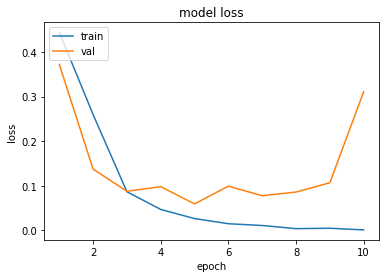

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

# 데이터를 숫자 연산이 가능한 벡터로 변환하는 층
# 32개의 숫자로 변환
model.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32

# RNN 설정 - 앞에서 32개의 숫자로 변환했으므로 32를 설정합니다.
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32

# 출력층 - 이진 분류이므로 출력의 개수는 1개이고 활성화 함수는 simgmoid입니다.
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# 저장 callback 생성
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-RNN-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2,
                                        callbacks = [checkpoint_cb, early_stopping_cb])

# 평가 점수 확인

print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
52/52 [==============================] - 11s 190ms/step - loss: 0.3005 - acc: 0.9051 - val_loss: 0.1418 - val_acc: 0.9577
Epoch 2/100
52/52 [==============================] - 10s 187ms/step - loss: 0.1008 - acc: 0.9743 - val_loss: 0.0971 - val_acc: 0.9686
Epoch 3/100
52/52 [==============================] - 10s 185ms/step - loss: 0.0568 - acc: 0.9858 - val_loss: 0.0595 - val_acc: 0.9843
Epoch 4/100
52/52 [==============================] - 10s 187ms/step - loss: 0.2412 - acc: 0.9033 - val_loss: 0.8532 - val_acc: 0.5998
Epoch 5/100
52/52 [==============================] - 10s 189ms/step - loss: 0.2913 - acc: 0.8767 - val_loss: 0.1121 - val_acc: 0.9637
Epoch 6/100
33/33 [==============================] - 1s 18ms/step - loss: 0.0602 - acc: 0.9845

 테스트 정확도: 0.9845


### 각 epoch별 loss확인
- loss가 epoch이 지날 수록 train은 내려가지만 val은 올라감
2개의 그래프 차이가 많이 나면 과대 적합 되었을 가능성이 높

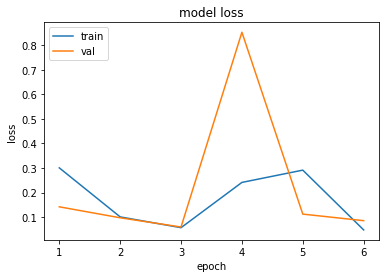

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## 🎺🎷🥁🎵🔉IMDB리뷰 분류 Embedding한 것과 안한 것 비교해보기

## 5. 단어 임베딩
- 자연어 처리에서 하나의 단어를 벡터 연산이 가능하도록 수치화하는 것을 단어 임베딩이라고 합니다.



### 1) 원핫 인코딩으로 처리
- 등장하는 단어의 개수만큼의 차원을 만들고 자신의 단어에 해당하는 열에 1을 설정하는 방식
- sparse matrix(희소 행렬)의 형태
- 거리 계산을 하지 않습니다.



### 2) word2vec
- 하나의 단어를 희소 행렬이 아닌 Dense Matrix로 만드는 방식. - 분산 표현 방식이라고도 합니다. 비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다는 가설을 가지고 생성합니다. - 앞 뒤 단어와의 관계를 파악해서 수치화를 합니다. 단어나 문장들 사이의 거리 계산이 가능합니다.vector로 
- 두가지 방식이 존재하는데 하나는 주변에 있는 단어들을 가지고 중심단어를 예측하는 CBOW(Continuous Bag of Words)가 있고 중심 단어를 가지고 주변 단어를 예측하는 Skip gram이 있습니다. 



### 3) keras의 Embedding
- 처음에는 숫자를 랜덤하게 초기화하고 훈련을 통해서 좋은 단어 임베딩을 학습합니다.
- 출력할 비트 수만 설정하면 스스로가 훈련을 통해서 최적의 값을 찾아갑니다.
- 일반적으로 padding 작업까지만 하고 이 Layer를 추가하면 수치화는 keras가 수행해줍니다.



## LSTM(Long Short-Term Memory)
- SimpleRNN(RNN)층은 긴 시퀀스를 학습하기 어려운데 시퀀스가 길어질수록 순환하는 은닉 상태에 담긴 정보가 점차 희식되기 때문에 멀리 떨어져 있는 단어 정보를 인식하는데 어렵습니다. 모델이 복잡해지면 경사가 기하급수적으로 감소하는 경사 소실과 기울기가 너무 큰 값이 되면서 나타나는 경사 폭발로 제대로 된 훈련이 어려워지기 때문입니다.
- 산에서 내려올 때 기울기가 가장 급한 쪽으로 내려오는 방식으로 동작하는 것이 경사 하강법입니다. 
- 딥 러닝에서는 한번 내려온 후 다른 길을 통해서 내려와보는 방식을 취합니다. 그래서 epoch를 설정하여 여러가지 길을 내려옵니다.
- 경사가 급할 때는 되돌아가기 힘들어지므로 breakpoint설정으로 중간지점을 저장하여 되돌아갈 필요가 있을때 breakpoint로 되돌아가도록 합니다.



### 1.LSTM
장기 의존성 문제를 해결하기 위해서 단기 기억을 오래 기억하기 위해 고안된 알고리즘입니다. 중요한 부분이 맨 앞이나 맨 뒤에 있을 때 사용하기 좋은 방식입니다. 대표적으로 주식의 경우 중요부분이 맨앞에 있어서 LSTM을 사용합니다.

- 입력이 들어오면 시그모이드 함수를 이용하여 중요한 값들을 저장해 둔다. 그래서 저장해야할 내용이 늘어남.
- Forget gate : 중요하지 않은 부분 지우기
- input gate : tanh를 거쳐 시그모이드함수를 거쳐 더할지 말지를 결정 
- output gate 



### LSTM을 이용한 imdb 데이터 감성 분류하기
- 이 데이터는 케라스에서 제공하는 데이터로 각 리뷰에 대해서 이미 수치화가 되어 있어서 실제 사용할 때는 얼마나 더 기억해야 되는지만 설정하면 됩니다.
- 필요한만큼의 데이터만 가져와서 패딩 작업을 해서 사용하면 됩니다.

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

# num_words는 몇 개의 단어를 사용할 것인지 설정하는 파라미터
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
print(train_input.shape)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=32)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(25000,)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


### Padding작업
- 원래는 분포도 확인해야됨

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)
print(train_seq, val_seq)

[[ 11  31 324 ... 179   6 137]
 [  7 101 440 ...  44   2 361]
 [  2  10  10 ... 193   4   2]
 ...
 [ 68   2  50 ...   4 130   2]
 [  2   2   7 ...   2 215   2]
 [  2  42   2 ...  83 312   2]] [[ 13  92 124 ...  74  14   2]
 [ 22   9   6 ...   4   2   2]
 [  5   2   2 ... 218  87 498]
 ...
 [  6   2   2 ...   2   5 440]
 [  0   0   0 ...   2 455   2]
 [  9  38   2 ...  10   2   2]]


## 모델 생성

In [ ]:
from tensorflow import keras 
model = keras.Sequential()

# 500은 단어의 개수이고 input_length는 문장의 단어 개수
# 16은 몇자리 숫자로 표현할 것인지 설정 - 필수
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))

# 이진 분류의 sigmoid
model.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
# 저장 callback 생성
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, 
                    batch_size=64, 
                    validation_data=(val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 11ms/step - loss: 0.6920 - accuracy: 0.5447 - val_loss: 0.6912 - val_accuracy: 0.5518
Epoch 2/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6891 - accuracy: 0.5776 - val_loss: 0.6872 - val_accuracy: 0.5960
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6823 - accuracy: 0.6190 - val_loss: 0.6761 - val_accuracy: 0.6312
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6537 - accuracy: 0.6750 - val_loss: 0.6156 - val_accuracy: 0.7202
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5892 - accuracy: 0.7264 - val_loss: 0.5776 - val_accuracy: 0.7264
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5615 - accuracy: 0.7441 - val_loss: 0.5558 - val_accuracy: 0.7444
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5381 - accuracy: 0.7610 - val_loss: 0.5336 - val_accuracy: 0.75

- epochs횟수가 클수록 격차가 많이 벌어지지 않습니다.

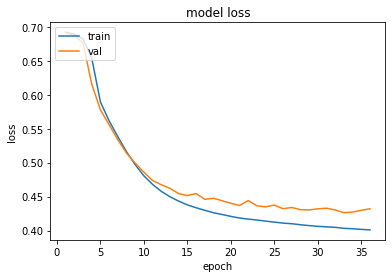

In [ ]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### drop out적용
- 성능이 떨어질 가능성이 높은데 이는 데이터를 일부분 삭제하고 이어서 훈련하기 때문
- 과대적합을 줄이기 위함이지 성능을 좋게하기 위한 목적으로 사용되지는 않습니다.
- 시각화를 해보면 train데이터와  validation 데이터 사이의 차이가 줄어들었습니다.

In [ ]:
from tensorflow import keras 
model2 = keras.Sequential()

# 500은 단어의 개수이고 input_length는 문장의 단어 개수
# 16은 몇자리 숫자로 표현할 것인지 설정 - 필수
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))

# 이진 분류의 sigmoid
model2.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
# 저장 callback 생성
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model2.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, 
                    batch_size=64, 
                    validation_data=(val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 13ms/step - loss: 0.6924 - accuracy: 0.5377 - val_loss: 0.6917 - val_accuracy: 0.5700
Epoch 2/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6904 - accuracy: 0.5897 - val_loss: 0.6892 - val_accuracy: 0.5968
Epoch 3/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6864 - accuracy: 0.6089 - val_loss: 0.6831 - val_accuracy: 0.6342
Epoch 4/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6747 - accuracy: 0.6471 - val_loss: 0.6612 - val_accuracy: 0.6604
Epoch 5/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6247 - accuracy: 0.7002 - val_loss: 0.5920 - val_accuracy: 0.7252
Epoch 6/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5790 - accuracy: 0.7274 - val_loss: 0.5656 - val_accuracy: 0.7372
Epoch 7/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5557 - accuracy: 0.7418 - val_loss: 0.5428 - val_accuracy:

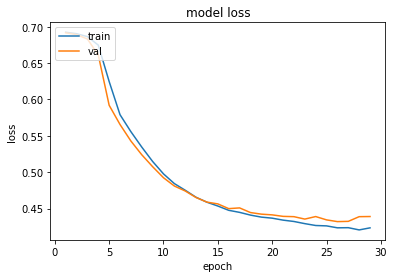

In [ ]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## 여러개의 RNN층 연결하기
- 앞의 층에서 뒤의 층으로 결과를 넘겨주어야 하므로  return_sequences=True를 설정해야 합니다.
CNN에서는 여러개의 합성곱 층을 만들 때 뉴런의 개수를 변경하면서 층을 쌓았지만 RNN에서는 뉴런의 개수를 줄일 필요가 없으며, 마지막 층은 return_sequences=True를 설정하지 않습니다.


In [ ]:
from tensorflow import keras 
model3 = keras.Sequential()

# 500은 단어의 개수이고 input_length는 문장의 단어 개수
# 16은 몇자리 숫자로 표현할 것인지 설정 - 필수
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))

# 이진 분류의 sigmoid
model3.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
# 저장 callback 생성
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model3.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, 
                    batch_size=64, 
                    validation_data=(val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 17ms/step - loss: 0.6924 - accuracy: 0.5322 - val_loss: 0.6914 - val_accuracy: 0.5446
Epoch 2/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6882 - accuracy: 0.5949 - val_loss: 0.6827 - val_accuracy: 0.6172
Epoch 3/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6646 - accuracy: 0.6418 - val_loss: 0.6337 - val_accuracy: 0.6688
Epoch 4/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5858 - accuracy: 0.7027 - val_loss: 0.5464 - val_accuracy: 0.7360
Epoch 5/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5351 - accuracy: 0.7410 - val_loss: 0.5186 - val_accuracy: 0.7536
Epoch 6/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5153 - accuracy: 0.7524 - val_loss: 0.4994 - val_accuracy: 0.7622
Epoch 7/100
313/313 [==============================] - 5s 15ms/step - loss: 0.4994 - accuracy: 0.7646 - val_loss: 0.4877 - val_accuracy:

- Layer가 1개 일때와 비교해보면 성능의 차이는 없지만 dropout을 두번 적용한 모델이 loss함수의 차이가 더 줄어든 것을 볼 수 있습니다.


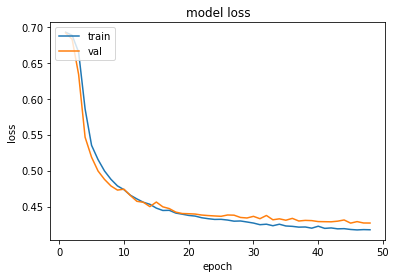

In [ ]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 네이버 영화 리뷰 데이터를 이용한 한국어 감성 분석
#### 데이터
- 총 200,000개의 Data로 구성되어 있으며 Train Data가 150,000개, Test Data가 50,000개로 구성되어 있습니다.
- 모든 리뷰의 길이는 140자 이내이며 리뷰 점수는 1점에서 10점 사이
- 9\~10 점을 긍정적 리뷰, 1\~4점을 부정적 리뷰로 분류하며, 5\~8점은 포함하지 않음
- 단어의 수가 중요하며, 글자의 수는 중요하지 않습니다.
- 파일의 형식은 txt이며 tab으로 각 열이 구분되어 있습니다.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
train_file = tf.keras.utils.get_file(
    'ratings_train.txt',
    origin='http://cyberadam.cafe24.com/movieimage/ratings_train.txt')
train = pd.read_csv(train_file, sep='\t')

print('훈련용 리뷰 개수 :',len(train))

14630912/14628807 [==============================] - 1s 0us/step
훈련용 리뷰 개수 : 150000


### label의 비율 확인
- 0과 1의 비율이 비슷합니다.

In [ ]:
train['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

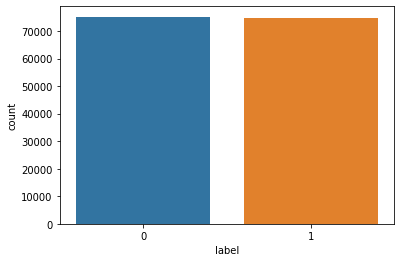

In [ ]:
sns.countplot(x='label', data=train)

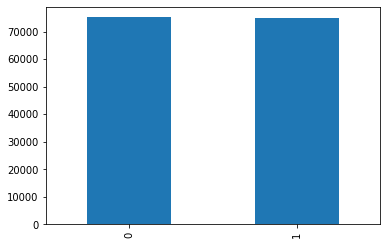

In [ ]:
train['label'].value_counts().plot(kind = 'bar')

# Missing Data 확인
- document에 Mssing Data가 5개 존재하므로 지워줍니다.

In [ ]:
train.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [ ]:
train[train['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


- 결측치제거

In [ ]:
train = train.dropna()
train.shape

(149995, 3)

### label별 텍스트 길이 확인


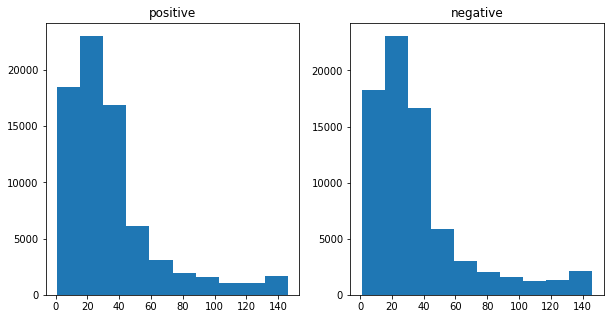

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

data_len = train[train['label'] == 1]['document'].str.len()
ax1.hist(data_len)
ax1.set_title('positive')

data_len = train[train['label'] == 0]['document'].str.len()
ax2.hist(data_len)
ax2.set_title('negative')
plt.show()

### 한글 형태소 분석기 설치
- JDK를 설치하고 수행해야 합니다.

- MAC용

In [ ]:
#Windows 에서는 Mecab 지원 안함
#jdk 를 설치 한 후 JAVA_HOME 환경변수에 jdk 경로를 설정해야 함
pip install --upgrade pip
pip install JPype1-0.5.7-cp27-none-win_amd64.whl
pip install konlpy

- colab용

In [ ]:
# Mecab 형태소 설치 - 코랩에서의 설치
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python3-dev python3-pip curl
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"
%%bash
pip3 install JPype1
pip3 install konlpy
apt-get install curl git
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Process is interrupted.


In [ ]:
# Kkma, Komoran, Okt, Mecab 형태소
import konlpy
from konlpy.tag import Kkma, Komoran, Okt, Mecab

kkma = Kkma()
komoran = Komoran()
okt = Okt()
mecab = Mecab()

원래라면 띄어쓰기가 없어서 하나의 단어로 나와야 하지만 konlpy 

- okt가 신조어 인식을 더 잘합니다.

In [ ]:
# 형태소별 샘플
text = "시리야안녕오늘날씨어때?"
def sample_ko_pos(text):
    print(f"==== {text} ====") 
    print("kkma:",kkma.pos(text))
    print("komoran:",komoran.pos(text))
    print("okt:",okt.pos(text))
    print("mecab:",mecab.pos(text)) 
    print("\n")
sample_ko_pos(text)

==== 시리야안녕오늘날씨어때? ====
kkma: [('시', 'NNG'), ('리', 'NNG'), ('야', 'JX'), ('안녕', 'NNG'), ('오늘날', 'NNG'), ('씨', 'NNB'), ('어', 'VV'), ('어', 'ECS'), ('때', 'NNG'), ('?', 'SF')]
komoran: [('시', 'NNB'), ('리야', 'NNP'), ('안녕', 'NNP'), ('오늘날', 'NNP'), ('씨', 'NNB'), ('어떻', 'VA'), ('어', 'EF'), ('?', 'SF')]
okt: [('시리', 'Noun'), ('야', 'Josa'), ('안녕', 'Noun'), ('오늘날', 'Noun'), ('씨', 'Suffix'), ('어때', 'Adjective'), ('?', 'Punctuation')]
mecab: [('시리', 'VA'), ('야', 'EF'), ('안녕', 'IC'), ('오늘', 'MAG'), ('날씨', 'NNG'), ('어때', 'VA+EF'), ('?', 'SF')]




In [ ]:
text3 = "머머리랑댕댕이랑산책을다녀왔어요."
sample_ko_pos(text3)

==== 머머리랑댕댕이랑산책을다녀왔어요. ====
kkma: [('머', 'NP'), ('머리', 'NNG'), ('랑', 'JC'), ('댕댕이', 'NNG'), ('랑', 'JC'), ('산책', 'NNG'), ('을', 'JKO'), ('다녀오', 'VV'), ('았', 'EPT'), ('어요', 'EFN'), ('.', 'SF')]
komoran: [('머', 'NP'), ('머리', 'NNG'), ('랑', 'JKB'), ('댕', 'MAG'), ('댕', 'MAG'), ('이랑', 'NNG'), ('산책', 'NNP'), ('을', 'JKO'), ('다녀오', 'VV'), ('았', 'EP'), ('어요', 'EF'), ('.', 'SF')]
okt: [('머', 'Noun'), ('머리', 'Noun'), ('랑', 'Josa'), ('댕댕', 'Noun'), ('이랑', 'Josa'), ('산책', 'Noun'), ('을', 'Josa'), ('다녀왔어요', 'Verb'), ('.', 'Punctuation')]
mecab: [('머', 'IC'), ('머리', 'NNG'), ('랑', 'JKB'), ('댕댕이', 'NNG'), ('랑', 'JKB'), ('산책', 'NNG'), ('을', 'JKO'), ('다녀왔', 'VV+EP'), ('어요', 'EF'), ('.', 'SF')]




In [ ]:
# 텍스트 전처리(영어와 한글만 남기고 삭제)
train['document'] = train['document'].str.replace("[^A-Za-z가-힣ㄱ-ㅎㅏ-ㅣ ]","")
train['document'].head()

0                                    아 더빙 진짜 짜증나네요 목소리
1                           흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                            교도소 이야기구먼 솔직히 재미는 없다평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...
Name: document, dtype: object

- 불용어 제거하고 한글 형태소 분석 수행

In [ ]:
# 조사를 적어줍니다

stop_words = ['는', '을', '를', '이', '가', '은', '의', '던', '고', '하', '에', '들', '지', '게', '도', '와', '아']

def word_tokenization(text) :
    return [word for word in mecab.morphs(text) if word not in stop_words]

data = train['document'].apply((lambda x:word_tokenization(x)))
data.head()

0                        [아, 더, 빙, 진짜, 짜증, 나, 네요, 목소리]
1       [흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 조차, 가볍, 않, 구나]
2                              [너무, 재, 밓었다그래서보는것을추천한다]
3                [교도소, 이야기, 구먼, 솔직히, 재미, 없, 다, 평점, 조정]
4    [사이몬페그, 익살, 스런, 연기, 돋보였, 영화, 스파이더맨, 에서, 늙, 어, ...
Name: document, dtype: object

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
print('단어 개수 : ', len(tokenizer.word_index))

def get_vocab_size(threshold):
    cnt = 0
    for x in tokenizer.word_counts.values():
        if x >= threshold:
            cnt = cnt + 1
    return cnt

vocab_size = get_vocab_size(5)    
print('5회 이상 등장한 단어 개수 : ', vocab_size)

단어 개수 :  52171
5회 이상 등장한 단어 개수 :  15548


In [ ]:
# 던어 사전에 없는 단어 설정 
oov_tok = '<OOV>'
vocab_size = 15000
# 사전을 만들 때는 num_words만큼이 아니고 전부 사용
# 실제 텍스트를 대입했을 때 15000개만 꺼내는 것입니다.
tokenizer = Tokenizer(oov_token = oov_tok, num_words = vocab_size)
tokenizer.fit_on_texts(data)
print('단어 사전 개수 : ', len(tokenizer.word_counts))

training_size = 120000
train_sentences = data[:training_size]
valid_sentences = data[training_size:]

# 수치화
print(train_sentences[:2])
train_sequences = tokenizer.texts_to_sequences(train_sentences)
valid_sequences = tokenizer.texts_to_sequences(valid_sentences)
print(train_sentences[:2])

단어 사전 개수 :  52171
0                     [아, 더, 빙, 진짜, 짜증, 나, 네요, 목소리]
1    [흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 조차, 가볍, 않, 구나]
Name: document, dtype: object
0                     [아, 더, 빙, 진짜, 짜증, 나, 네요, 목소리]
1    [흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 조차, 가볍, 않, 구나]
Name: document, dtype: object


In [ ]:
# 패딩 작업
max_length = max(len(x) for x in train_sequences)
print(max_length)

trunc_type = 'post'
padding_type = 'post'

train_padded = pad_sequences(train_sequences, truncating=trunc_type,
                             padding=padding_type, maxlen = max_length)
valid_padded = pad_sequences(valid_sequences, truncating=trunc_type,
                             padding=padding_type, maxlen = max_length)
train_labels = np.asarray(train_padded)
valid_labels = np.asarray(valid_padded)
print('샘플:', train_padded[:1])

75
샘플: [[ 22  63 910  28 212   9  23 703   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]]


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

def create_model():
    model = Sequential([
                        Embedding(vocab_size, 32),
                        # 양방향
                        Bidirectional(LSTM(32, return_sequences=True)),
                        Dense(32, activation='relu'),
                        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          480000    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          16640     
_________________________________________________________________
dense (Dense)                (None, None, 32)          2080      
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           33        
Total params: 498,753
Trainable params: 498,753
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_file = tf.keras.utils.get_file(
    'ratings_test.txt', origin='http:/cyberadam.cafe24.com/ratings_test.txt', extract=True)
test = pd.read_csv(test_file, sep='\t', encoding='cp949')
test.head()

,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 Transitional//EN"" ""http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"">"
0,"<html xmlns=""http://www.w3.org/1999/xhtml"" xml..."
1,<head>
2,"<meta name=""viewport"" content=""user-scalable=n..."
3,"<meta http-equiv=""content-type"" content=""text/..."
4,"<link rel=""shortcut icon"" type=""image/x-icon"" ..."


In [ ]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")
test = pd.read_table('ratings_test.txt')
test.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


## Test Data preprocessing and evaluate
- 정확도가 0.84정도 

In [ ]:
# 테스트 데이터 전처리
def preprocessing(df):
    df['document'] = df['document'].str.replace("[^A-Za-z가-힣ㄱ-ㅎㅏ-ㅣ ]","")
    df = df.dropna()
    test_label = np.asarray(df['label'])
    test_data = df['document'].apply((lambda x: word_tokenization(x)))
    test_data = tokenizer.texts_to_sequences(test_data)
    test_data = pad_sequences(test_data, truncating=trunc_type, padding=padding_type, maxlen=max_length)
    return test_data, test_label

test_data, test_label = preprocessing(test)
print(model.evaluate(test_data, test_label))


1563/1563 [==============================] - 22s 12ms/step - loss: 0.6931 - accuracy: 0.5028
[0.6931455731391907, 0.5027522444725037]


In [ ]:
model2 = create_model()
model2.evaluate(test_data, test_label)

1563/1563 [==============================] - 27s 12ms/step - loss: 0.6931 - accuracy: 0.5006


[0.6931419968605042, 0.500640332698822]

## 예측하기
- 0.04이므로 부정입니다.

In [ ]:
def sentiment_predict(new_sentence):
    sample_data = pd.Series([new_sentence.replace('[^A-Za-z가-힣ㄱ-ㅎㅏ-ㅣ ]',' ')])

    sample_data = sample_data.apply((lambda x: word_tokenization(x)))
    sample_data = tokenizer.texts_to_sequences(sample_data)
    sample_data = pad_sequences(sample_data, truncating=trunc_type, padding=padding_type, maxlen=max_length)

    score = model.predict(sample_data)
    score = float(score[0][0][0])
    if score > 0.5 :
        print('{:.2f}%확률로 긍정 리뷰입니다.'.format(score * 100))
    else :
        print('{:.2f}%확률로 부정 리뷰입니다.'.format((1-score) * 100))


In [ ]:
msg = input('리뷰를 작성하세요 : ')
sentiment_predict(msg)

리뷰를 작성하세요 : 무슨 생각으로 영화를 만든건지 궁금해짐
50.08%확률로 부정 리뷰입니다.


In [ ]:
여